In [2]:
!conda install xlrd -y #needed for pd.read_excel

Solving environment: done

# All requested packages already installed.



In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xlrd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from src.split_data import statmodels_split
pd.set_option("display.max_columns", 101)

In [4]:
titanic = pd.read_excel("https://hbiostat.org/data/repo/titanic3.xls")

In [5]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [6]:
titanic.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

## Discussion: if I want to make a logistic regression model to predict the survivors of the titanic, which columns should I drop??

In [7]:
titanic.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [8]:
### 'boat' should be dropped (why?)
### 'body' should be dropped (why?)

In [9]:
titanic.drop(['boat', 'body'], axis='columns')

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN


In [10]:
### Survived is our target column. This is what we are trying to predict

In [11]:
# let's look at missing values
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [12]:
# we are missing a fair amount of ages of the passengers, can we figure out a way to impute them? 
# was being young a factor in survival?

In [13]:
titanic['embarked'].unique()

array(['S', 'C', nan, 'Q'], dtype=object)

In [14]:
titanic['pclass'].nunique(), titanic['pclass'].unique()

(3, array([1, 2, 3]))

In [15]:
titanic['sibsp'].nunique(), titanic['sibsp'].unique()

(7, array([0, 1, 2, 3, 4, 5, 8]))

In [16]:
titanic['parch'].nunique(), titanic['parch'].unique()

(8, array([0, 2, 1, 4, 3, 5, 6, 9]))

In [17]:
titanic['ticket'].nunique(), titanic['ticket'].unique()

(939,
 array([24160, 113781, 19952, 13502, 112050, 11769, 'PC 17609', 'PC 17757',
        'PC 17477', 19877, 27042, 'PC 17318', 'PC 17558', 11813, 13050,
        11751, 111369, 'PC 17483', 13905, 11967, 'PC 17760', 110564,
        113784, 112277, 36928, 113783, 110489, 'PC 17608', 113505, 111427,
        113054, 'PC 17591', 112379, 'PC 17610', 16966, 113050, 113798,
        'PC 17476', 'PC 17606', 'PC 17755', 695, 113059, 113760, 19924,
        17770, 'W.E.P. 5734', 113806, 110152, 'PC 17594', 112051, 13508,
        110465, 5727, 'PC 17756', 11770, 113791, 'WE/P 5735', 112901,
        'PC 17599', 113055, 113804, 'F.C. 12750', 17474, 33638, 'PC 17761',
        11755, 'PC 17485', 'PC 17580', 11767, 36947, 'PC 17531',
        'PC 17598', '17421', 'PC 17474', '113051', '19950', '113778',
        'PC 17611', '17765', '13568', '13567', '112058', '113803',
        '111320', '113503', '112378', 'PC 17593', '17453', 'PC 17754',
        '113780', '112053', 'PC 17582', 'PC 17759', '11765', 'PC 17

In [18]:
titanic['home.dest'].unique(), titanic['home.dest'].nunique()

(array(['St Louis, MO', 'Montreal, PQ / Chesterville, ON', 'New York, NY',
        'Hudson, NY', 'Belfast, NI', 'Bayside, Queens, NY',
        'Montevideo, Uruguay', 'Paris, France', nan, 'Hessle, Yorks',
        'Montreal, PQ', 'Winnipeg, MN', 'San Francisco, CA',
        'Dowagiac, MI', 'Stockholm, Sweden / Washington, DC',
        'Trenton, NJ', 'Glen Ridge, NJ', 'Youngstown, OH',
        'Birkdale, England Cleveland, Ohio', 'London / Winnipeg, MB',
        'Cooperstown, NY', 'St Leonards-on-Sea, England Ohio',
        'Los Angeles, CA', 'Pomeroy, WA', 'Omaha, NE', 'Philadelphia, PA',
        'Denver, CO', 'Belmont, MA', 'Washington, DC',
        'Austria-Hungary / Germantown, Philadelphia, PA',
        'Germantown, Philadelphia, PA', 'Bryn Mawr, PA',
        'Ascot, Berkshire / Rochester, NY', 'Little Onn Hall, Staffs',
        'Amenia, ND', 'New York, NY / Ithaca, NY', 'London, England',
        'Liverpool, England / Belfast', 'Stoughton, MA', 'Victoria, BC',
        'Lakewood, NJ

In [19]:
titanic['cabin'].nunique(), titanic['cabin'].unique()

(186,
 array(['B5', 'C22 C26', 'E12', 'D7', 'A36', 'C101', nan, 'C62 C64', 'B35',
        'A23', 'B58 B60', 'D15', 'C6', 'D35', 'C148', 'C97', 'B49', 'C99',
        'C52', 'T', 'A31', 'C7', 'C103', 'D22', 'E33', 'A21', 'B10', 'B4',
        'E40', 'B38', 'E24', 'B51 B53 B55', 'B96 B98', 'C46', 'E31', 'E8',
        'B61', 'B77', 'A9', 'C89', 'A14', 'E58', 'E49', 'E52', 'E45',
        'B22', 'B26', 'C85', 'E17', 'B71', 'B20', 'A34', 'C86', 'A16',
        'A20', 'A18', 'C54', 'C45', 'D20', 'A29', 'C95', 'E25', 'C111',
        'C23 C25 C27', 'E36', 'D34', 'D40', 'B39', 'B41', 'B102', 'C123',
        'E63', 'C130', 'B86', 'C92', 'A5', 'C51', 'B42', 'C91', 'C125',
        'D10 D12', 'B82 B84', 'E50', 'D33', 'C83', 'B94', 'D49', 'D45',
        'B69', 'B11', 'E46', 'C39', 'B18', 'D11', 'C93', 'B28', 'C49',
        'B52 B54 B56', 'E60', 'C132', 'B37', 'D21', 'D19', 'C124', 'D17',
        'B101', 'D28', 'D6', 'D9', 'B80', 'C106', 'B79', 'C47', 'D30',
        'C90', 'E38', 'C78', 'C30', 'C118', 'D

In [20]:
dropped = ['cabin', 'home.dest', 'ticket','boat', 'body']
df = titanic.drop(dropped, axis = 'columns')
df

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,151.5500,S
...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,14.4542,C
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,14.4542,C
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,7.2250,C
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,7.2250,C


## Summary: We can try to investigate sibsp, parch, fare, embarked, and pclass as possible variables

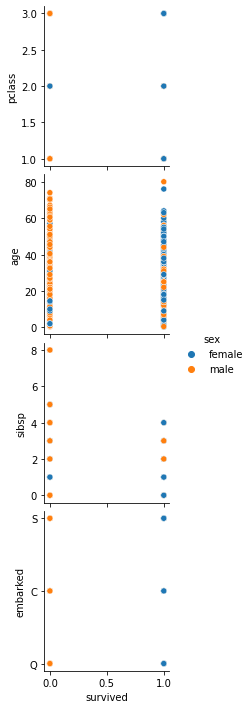

In [21]:
sns.pairplot(df, y_vars=['pclass', 'age', 'sibsp', 'embarked'], x_vars=['survived'], hue='sex')

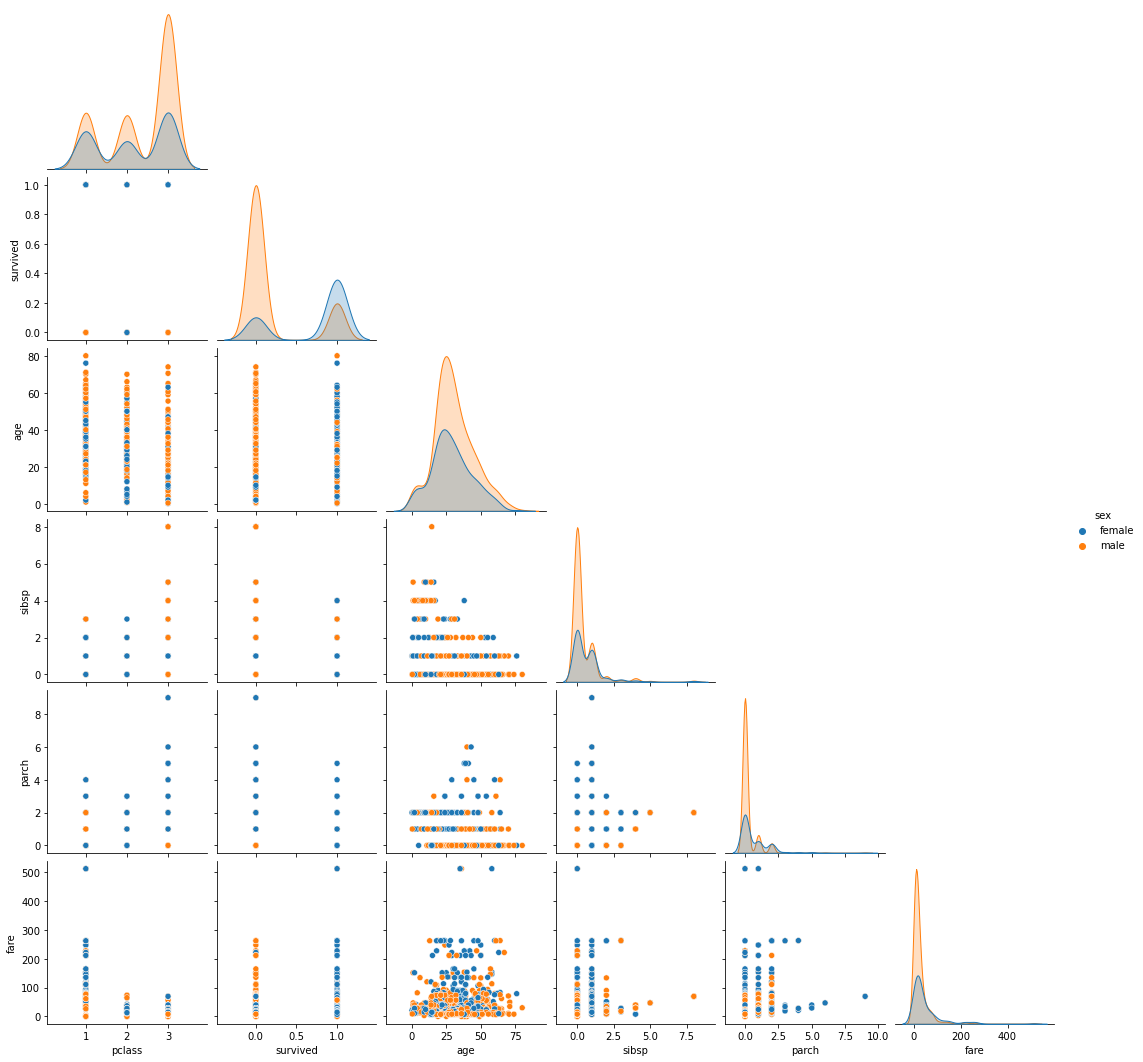

In [22]:
sns.pairplot(df, hue='sex', corner=True)

## Which are the interesting plots worth investigating at full size of the ones above??

<AxesSubplot:xlabel='fare', ylabel='survived'>

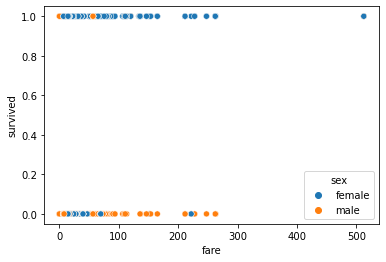

In [23]:
sns.scatterplot(x='fare', y='survived', hue='sex', data=df)

<AxesSubplot:xlabel='survived', ylabel='fare'>

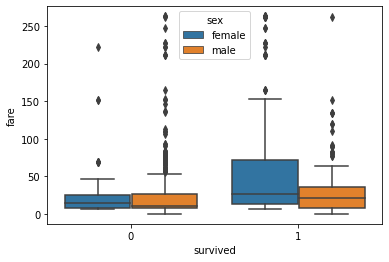

In [24]:
sns.boxplot(y='fare', x='survived', hue='sex', data=df[df.fare < 300])

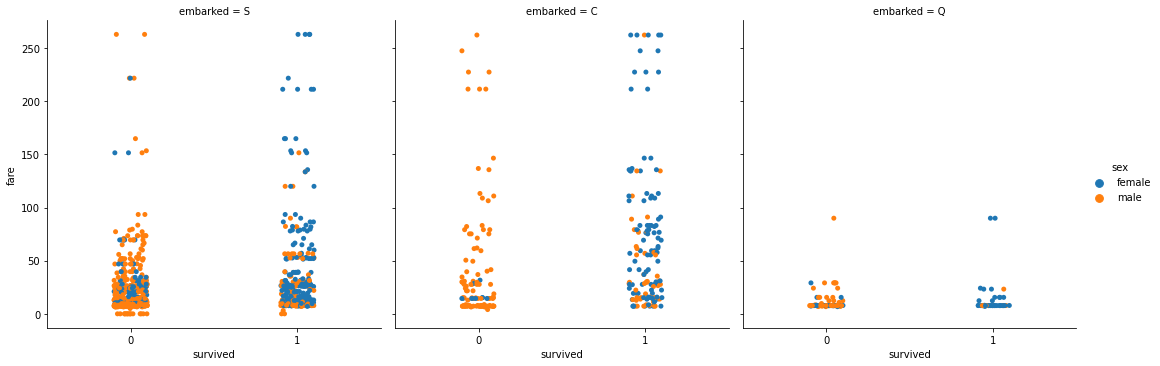

In [25]:
sns.catplot(y='fare', x='survived', hue='sex', col='embarked', data=df[df.fare < 300])

<AxesSubplot:xlabel='survived', ylabel='fare'>

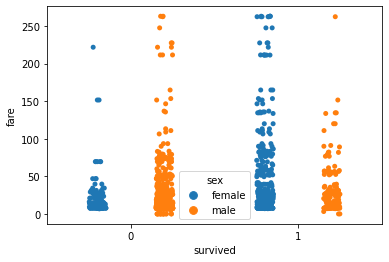

In [26]:
sns.stripplot(y='fare', x='survived', hue='sex', dodge=True, data=df[df.fare < 300])

<AxesSubplot:xlabel='survived', ylabel='fare'>

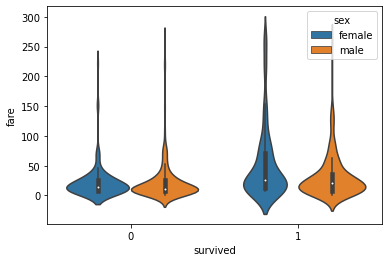

In [27]:
sns.violinplot(y='fare', x='survived', hue='sex', dodge=True, data=df[df.fare < 300])

<AxesSubplot:xlabel='survived', ylabel='fare'>

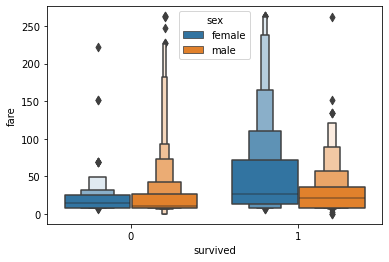

In [28]:
sns.boxenplot(y='fare', x='survived', hue='sex', dodge=True, data=df[df.fare < 300])

<AxesSubplot:xlabel='survived', ylabel='fare'>

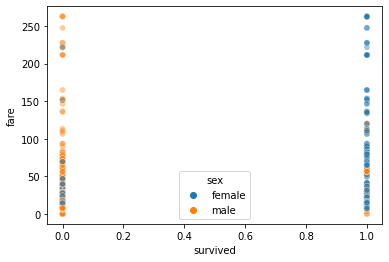

In [29]:
sns.scatterplot(y='fare', x='survived', hue='sex',alpha=0.4, x_jitter=0.1, y_jitter=0.1, data=df[df.fare < 300])

<AxesSubplot:xlabel='embarked', ylabel='count'>

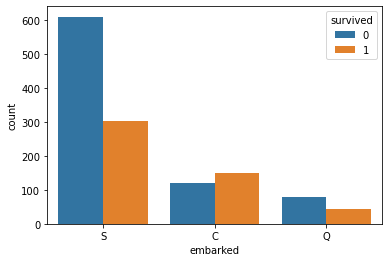

In [30]:
sns.countplot(x='embarked', hue='survived', data=df)

<AxesSubplot:xlabel='pclass', ylabel='count'>

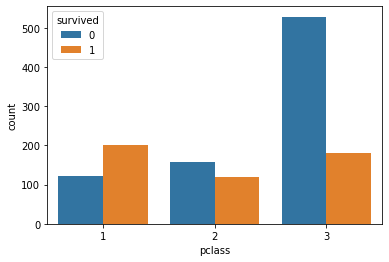

In [31]:
sns.countplot(x='pclass', hue='survived', data=df)

<AxesSubplot:xlabel='sibsp', ylabel='count'>

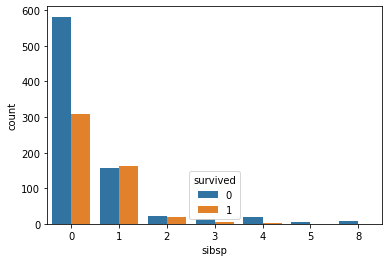

In [32]:
sns.countplot(x='sibsp', hue='survived', data=df)

<AxesSubplot:xlabel='parch', ylabel='count'>

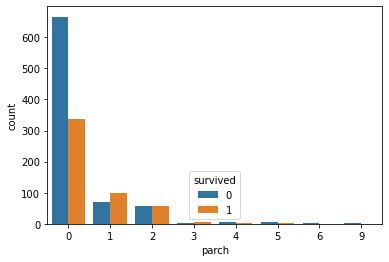

In [33]:
sns.countplot(x='parch', hue='survived', data=df)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   fare      1308 non-null   float64
 8   embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(3)
memory usage: 92.2+ KB


<AxesSubplot:xlabel='pclass', ylabel='count'>

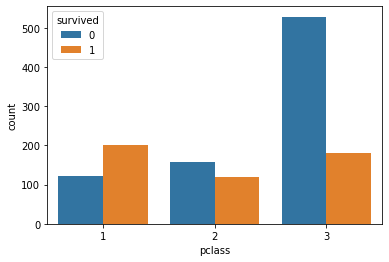

In [35]:
sns.countplot(x='pclass', hue='survived', data=df)

In [62]:
df.loc[:,'title'] = df.name.str.split(',', expand=True)[1].str.split('.', expand=True)[0].str.strip()

In [63]:
df.title.unique()

array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'the Countess', 'Don',
       'Rev', 'Ms'], dtype=object)

In [77]:
df['title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Mlle              2
Major             2
Ms                2
Jonkheer          1
the Countess      1
Mme               1
Sir               1
Don               1
Lady              1
Capt              1
Dona              1
Name: title, dtype: int64

In [ ]:
['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'the Countess', 'Don',
       'Rev', 'Ms']

In [76]:
df[df['title'].value_counts() <4

Mr              False
Miss            False
Mrs             False
Master          False
Dr              False
Rev             False
Col             False
Mlle             True
Major            True
Ms               True
Jonkheer         True
the Countess     True
Mme              True
Sir              True
Don              True
Lady             True
Capt             True
Dona             True
Name: title, dtype: bool

In [ ]:

Mlle             True
Major            True
Ms               True
Jonkheer         True
the Countess     True
Mme              True
Sir              True
Don              True
Lady             True
Capt             True
Dona             True

In [67]:
df[df['title']== 'the Countess']

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked,title
245,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,86.5,S,the Countess


In [68]:
df[df['title']== 'Jonkheer']

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked,title
234,1,0,"Reuchlin, Jonkheer. John George",male,38.0,0,0,0.0,S,Jonkheer


In [78]:
titles = ['Mme','Major', 'Capt',
       'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'the Countess', 'Don','Ms']

df[df['title'].isin(titles)]

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked,title
12,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,69.3000,C,Mme
45,1,0,"Butt, Major. Archibald Willingham",male,45.0,0,0,26.5500,S,Major
81,1,0,"Crosby, Capt. Edward Gifford",male,70.0,1,1,71.0000,S,Capt
99,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,39.6000,C,Lady
100,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1,0,56.9292,C,Sir
199,1,1,"Mayne, Mlle. Berthe Antonine (""Mrs de Villiers"")",female,24.0,0,0,49.5042,C,Mlle
218,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C,Dona
231,1,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,30.5000,S,Major
234,1,0,"Reuchlin, Jonkheer. John George",male,38.0,0,0,0.0000,S,Jonkheer
245,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,86.5000,S,the Countess


so O'Donoghue, Ms. Bridget is the only one of low frequency that we have to worry about. 
Let's change her title to Miss

In [83]:
df.loc[1076,'title'] = 'Miss'

In [84]:
titles = ['Mme','Major', 'Capt',
       'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'the Countess', 'Don','Ms']

df[df['title'].isin(titles)]

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked,title
12,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,69.3000,C,Mme
45,1,0,"Butt, Major. Archibald Willingham",male,45.0,0,0,26.5500,S,Major
81,1,0,"Crosby, Capt. Edward Gifford",male,70.0,1,1,71.0000,S,Capt
99,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,39.6000,C,Lady
100,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1,0,56.9292,C,Sir
199,1,1,"Mayne, Mlle. Berthe Antonine (""Mrs de Villiers"")",female,24.0,0,0,49.5042,C,Mlle
218,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C,Dona
231,1,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,30.5000,S,Major
234,1,0,"Reuchlin, Jonkheer. John George",male,38.0,0,0,0.0000,S,Jonkheer
245,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,86.5000,S,the Countess


so now lets onehotencode the titles and run MICE on the ages

In [103]:
counts = df['title'].value_counts()
sorted_titles = counts.index[::-1].to_list()
sorted_titles

['Dona',
 'Capt',
 'Lady',
 'Don',
 'Sir',
 'Mme',
 'Ms',
 'the Countess',
 'Jonkheer',
 'Major',
 'Mlle',
 'Col',
 'Rev',
 'Dr',
 'Master',
 'Mrs',
 'Miss',
 'Mr']

In [104]:
sorted_titles.insert(15,'Mr')
sorted_titles.pop()
sorted_titles

['Dona',
 'Capt',
 'Lady',
 'Don',
 'Sir',
 'Mme',
 'Ms',
 'the Countess',
 'Jonkheer',
 'Major',
 'Mlle',
 'Col',
 'Rev',
 'Dr',
 'Master',
 'Mr',
 'Mrs',
 'Miss']

In [105]:
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder

In [106]:
df

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,211.3375,S,Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,151.5500,S,Master
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,151.5500,S,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,151.5500,S,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,151.5500,S,Mrs
...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,14.4542,C,Miss
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,14.4542,C,Miss
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,7.2250,C,Mr
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,7.2250,C,Mr


In [107]:
df['title'].unique()

array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'the Countess', 'Don',
       'Rev', 'Ms'], dtype=object)

In [122]:
df['embarked'].value_counts(), len(df['embarked'])

(S    914
 C    270
 Q    123
 Name: embarked, dtype: int64,
 1309)

In [124]:
sum(df['embarked'].isna())

2

In [127]:
df.loc[:,'embarked'] = df['embarked'].fillna(value='S')

In [120]:
df.loc[:,'embarked_fill'] = df['embarked'].isna().astype('int')

df.loc[:,'age_fill'] = df['age'].isna().astype('int')

In [121]:
df

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked,title,title_labels,embarked_fill,age_fill
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,211.3375,S,Miss,9,0,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,151.5500,S,Master,8,0,0
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,151.5500,S,Miss,9,0,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,151.5500,S,Mr,12,0,0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,151.5500,S,Mrs,13,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,14.4542,C,Miss,9,0,0
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,14.4542,C,Miss,9,0,1
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,7.2250,C,Mr,12,0,0
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,7.2250,C,Mr,12,0,0


In [129]:
sum(df['age_fill'])

263

In [130]:
sum(df['embarked_fill'])

2

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pclass         1309 non-null   int64  
 1   survived       1309 non-null   int64  
 2   name           1309 non-null   object 
 3   sex            1309 non-null   object 
 4   age            1046 non-null   float64
 5   sibsp          1309 non-null   int64  
 6   parch          1309 non-null   int64  
 7   fare           1308 non-null   float64
 8   embarked       1309 non-null   object 
 9   title          1309 non-null   object 
 10  title_labels   1309 non-null   int64  
 11  embarked_fill  1309 non-null   int64  
 12  age_fill       1309 non-null   int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 133.1+ KB


In [132]:
df[df['fare'].isna()]

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked,title,title_labels,embarked_fill,age_fill
1225,3,0,"Storey, Mr. Thomas",male,60.5,0,0,NaN,S,Mr,12,0,0


In [137]:
df[['fare', 'pclass']].groupby('pclass').median()

,fare
pclass,
1,60.0000
2,15.0458
3,8.0500


In [138]:
df.loc[1225, 'fare'] = 8.05

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pclass         1309 non-null   int64  
 1   survived       1309 non-null   int64  
 2   name           1309 non-null   object 
 3   sex            1309 non-null   object 
 4   age            1046 non-null   float64
 5   sibsp          1309 non-null   int64  
 6   parch          1309 non-null   int64  
 7   fare           1309 non-null   float64
 8   embarked       1309 non-null   object 
 9   title          1309 non-null   object 
 10  title_labels   1309 non-null   int64  
 11  embarked_fill  1309 non-null   int64  
 12  age_fill       1309 non-null   int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 133.1+ KB


In [195]:
data = df.drop(['survived', 'name'], axis='columns') #do not let your imputer see your target!

In [182]:
data

,pclass,sex,age,sibsp,parch,fare,embarked,title,title_labels,embarked_fill,age_fill
0,1,female,29.0000,0,0,211.3375,S,Miss,9,0,0
1,1,male,0.9167,1,2,151.5500,S,Master,8,0,0
2,1,female,2.0000,1,2,151.5500,S,Miss,9,0,0
3,1,male,30.0000,1,2,151.5500,S,Mr,12,0,0
4,1,female,25.0000,1,2,151.5500,S,Mrs,13,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,female,14.5000,1,0,14.4542,C,Miss,9,0,0
1305,3,female,NaN,1,0,14.4542,C,Miss,9,0,1
1306,3,male,26.5000,0,0,7.2250,C,Mr,12,0,0
1307,3,male,27.0000,0,0,7.2250,C,Mr,12,0,0


## Transform the Embarked data

In [183]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [185]:
LabelEncoder().fit(data['embarked'].unique()) # will use this on the RHS below

LabelEncoder()

In [196]:
embarked_le = LabelEncoder().fit(data['embarked'].unique())
data.loc[:,'embarked_labels'] = embarked_le.transform(data['embarked'])

embarked_ohe = OneHotEncoder(sparse=False)
embarked_ohe.fit_transform(embarked_le.transform(data['embarked']).reshape(-1,1))

In [201]:
data.loc[:,['embarked_C', 'embarked_Q', 'embarked_S']] = embarked_ohe.fit_transform(embarked_le.transform(data['embarked']).reshape(-1,1)).astype(int)

In [202]:
data

,pclass,sex,age,sibsp,parch,fare,embarked,title,title_labels,embarked_fill,age_fill,embarked_labels,embarked_C,embarked_Q,embarked_S
0,1,female,29.0000,0,0,211.3375,S,Miss,9,0,0,2,0,0,1
1,1,male,0.9167,1,2,151.5500,S,Master,8,0,0,2,0,0,1
2,1,female,2.0000,1,2,151.5500,S,Miss,9,0,0,2,0,0,1
3,1,male,30.0000,1,2,151.5500,S,Mr,12,0,0,2,0,0,1
4,1,female,25.0000,1,2,151.5500,S,Mrs,13,0,0,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,female,14.5000,1,0,14.4542,C,Miss,9,0,0,0,1,0,0
1305,3,female,NaN,1,0,14.4542,C,Miss,9,0,1,0,1,0,0
1306,3,male,26.5000,0,0,7.2250,C,Mr,12,0,0,0,1,0,0
1307,3,male,27.0000,0,0,7.2250,C,Mr,12,0,0,0,1,0,0


# lets now transform the titles

In [214]:
data['title'].value_counts()[0]

757

In [216]:
title_le = LabelEncoder().fit(data['title'].unique())
data.loc[:,'title_labels'] = embarked_le.transform(data['title'])

title_ohe = OneHotEncoder(sparse=False)
output = title_ohe.fit_transform(title_le.transform(data['title']).reshape(-1,1))

In [217]:
output

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [218]:
title_ohe.categories_

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17])]

In [220]:
title_le.classes_

array(['Capt', 'Col', 'Don', 'Dona', 'Dr', 'Jonkheer', 'Lady', 'Major',
       'Master', 'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir',
       'the Countess'], dtype=object)

In [222]:
mapping = zip(title_le.classes_,title_ohe.categories_)

In [225]:
data.loc[:,title_le.classes_] = title_ohe.fit_transform(title_le.transform(data['title']).reshape(-1,1)).astype(int)

In [226]:
data #now ready for multiple imputation

,pclass,sex,age,sibsp,parch,fare,embarked,title,title_labels,embarked_fill,age_fill,embarked_labels,embarked_C,embarked_Q,embarked_S,Capt,Col,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
0,1,female,29.0000,0,0,211.3375,S,Miss,9,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,1,male,0.9167,1,2,151.5500,S,Master,8,0,0,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,female,2.0000,1,2,151.5500,S,Miss,9,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1,male,30.0000,1,2,151.5500,S,Mr,12,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1,female,25.0000,1,2,151.5500,S,Mrs,13,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,female,14.5000,1,0,14.4542,C,Miss,9,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1305,3,female,NaN,1,0,14.4542,C,Miss,9,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1306,3,male,26.5000,0,0,7.2250,C,Mr,12,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1307,3,male,27.0000,0,0,7.2250,C,Mr,12,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [234]:
data.loc[:,'sex_label'] = LabelEncoder().fit_transform(data['sex'])

In [235]:
data

,pclass,sex,age,sibsp,parch,fare,embarked,title,title_labels,embarked_fill,age_fill,embarked_labels,embarked_C,embarked_Q,embarked_S,Capt,Col,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess,sex_label
0,1,female,29.0000,0,0,211.3375,S,Miss,9,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1,male,0.9167,1,2,151.5500,S,Master,8,0,0,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,1,female,2.0000,1,2,151.5500,S,Miss,9,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,1,male,30.0000,1,2,151.5500,S,Mr,12,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,1,female,25.0000,1,2,151.5500,S,Mrs,13,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,female,14.5000,1,0,14.4542,C,Miss,9,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1305,3,female,NaN,1,0,14.4542,C,Miss,9,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1306,3,male,26.5000,0,0,7.2250,C,Mr,12,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1307,3,male,27.0000,0,0,7.2250,C,Mr,12,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [236]:
data.select_dtypes(include=np.number) #this gets all the numeric columns in the dataframe

,pclass,age,sibsp,parch,fare,title_labels,embarked_fill,age_fill,embarked_labels,embarked_C,embarked_Q,embarked_S,Capt,Col,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess,sex_label
0,1,29.0000,0,0,211.3375,9,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1,0.9167,1,2,151.5500,8,0,0,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,1,2.0000,1,2,151.5500,9,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,1,30.0000,1,2,151.5500,12,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,1,25.0000,1,2,151.5500,13,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,14.5000,1,0,14.4542,9,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1305,3,NaN,1,0,14.4542,9,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1306,3,26.5000,0,0,7.2250,12,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1307,3,27.0000,0,0,7.2250,12,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [237]:
data.select_dtypes(include=np.number).columns.tolist()

['pclass',
 'age',
 'sibsp',
 'parch',
 'fare',
 'title_labels',
 'embarked_fill',
 'age_fill',
 'embarked_labels',
 'embarked_C',
 'embarked_Q',
 'embarked_S',
 'Capt',
 'Col',
 'Don',
 'Dona',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Master',
 'Miss',
 'Mlle',
 'Mme',
 'Mr',
 'Mrs',
 'Ms',
 'Rev',
 'Sir',
 'the Countess',
 'sex_label']

In [ ]:
import seaborn as sns
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

# Load diamonds dataset
diamonds = sns.load_dataset("diamonds")
X, y = diamonds.drop("price", axis=1), diamonds.price.values.reshape(-1, 1)

# Isolate numeric and categorical cols
num_cols = X.select_dtypes(include=np.number).columns
cat_cols = X.select_dtypes(exclude=np.number).columns

>>> make_column_transformer((StandardScaler(), num_cols), 
                            (OneHotEncoder(), cat_cols))

ColumnTransformer(
  transformers=[('standardscaler', StandardScaler(),
                 Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')),
                ('onehotencoder', OneHotEncoder(),
                 Index(['cut', 'color', 'clarity'], dtype='object'))]
  )

In [ ]:
from sklearn.compose import make_column_selector

make_column_transformer(
    (StandardScaler(), make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(), make_column_selector(dtype_exclude=np.number)),
)

## Iterative Imputer usage from https://towardsdatascience.com/19-sklearn-features-you-didnt-know-existed-p-guarantee-0-75-79a5e9704dad

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

imp_mean = IterativeImputer(estimator=BayesianRidge())
imp_mean.fit([[7, 2, 3], [4, np.nan, 6], [10, 5, 9]])

X = [[np.nan, 2, 3], [4, np.nan, 6], [10, np.nan, 9]]

>>> imp_mean.transform(X)
array([[ 6.95847623,  2.        ,  3.        ],
       [ 4.        ,  2.6000004 ,  6.        ],
       [10.        ,  4.99999933,  9.        ]])